<a href="https://colab.research.google.com/github/jiminAn/2023_SUMMER_SAMSUNG_DL/blob/main/%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C/Day4/Day_4_3_RNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN Basic
### Practice Goal
- Let's examine the input data format for an RNN model and define the model.

### Contents
1. Input data format of the RNN model
2. Define the RNN model
  1. vanila RNN
  2. LSTM


In [1]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

## 1. Input Data Format for RNN Models

### Example: Let's use "hello" as input data for the RNN model.
![img.png](https://3863425935-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LIA3amopGH9NC6Rf0mA%2F-M4bJ-IWAKzglR0XHFwU%2F-M4bJ3KvyPXdSmZt6cU6%2Flanguage-model.png?generation=1586576265109629&alt=media)


In [3]:
# Let's convert "hello" into vectors using one-hot encoding.

# one-hot vector / one-hot encoding / one-hot embedding

h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]


In [4]:
input_data_np = np.array([[h, e, l, l, o]], dtype=np.float32) # Sequence Length 5 / Input Size 4
input_data = torch.Tensor(input_data_np)
input_data

tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]])

- Using the vectors defined above, let's additionally convert "eolll" and "lleel" into vectors.

In [5]:
# transform as torch tensor
input_data_np = np.array([[h, e, l, l, o],
                          [e, o, l, l, l],
                          [l, l, e, e, l]], dtype=np.float32)
input_data = torch.Tensor(input_data_np)
input_data.shape # (batch_size , sequence_length, input_size) (3, 5, 4)

torch.Size([3, 5, 4])

In [6]:
# (batch size, seq length(time step), input_size)
input_data.size()

torch.Size([3, 5, 4])

### 2.1 Vanila RNN

#### `torch.nn.RNN(input_size, hidden_size, batch_first)`
- [pytorch document](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)
- `input_size`: The number of features in the input
- `hidden_size`: The size of the hidden state (usually set arbitrarily)
- `batch_first`: Determines whether the first dimension of the input shape should be treated as the batch size
  - True: (batch, seq, feature)
  - False: (seq, batch, feature)

In [7]:
# declare dimension
input_size = 4
hidden_size = 3 #5 10

# declare RNN
rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)  # 처음에 batch_size or seq_length

In [8]:
input_data

tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]],

        [[0., 1., 0., 0.],
         [0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]]])

In [9]:
# check output
outputs, _ = rnn(input_data)  # (1, 5, 4) Inputs → (1, 5, 3) Outputs   status: (1, 1, 3)

# (batch_size x sequence length x input_size)

print("--------------Hidden states from all time steps-----------------")
print("outputs:\n", outputs)
print("outputs size:", outputs.size())  # Hidden states of dimension 3 from 5 time steps * 3 words
# shape: (3, 5, 3)
# (batch_size, seq_length, hidden_dim)

print("--------------Hidden state from the last time step-----------------")
print("hidden state:\n", outputs[:, -1, :])  # Hidden state at the last time step
print("hidden state size:", outputs[:, -1, :].size())
# shape: (1, 3, 3)
# (num_layers, batch_size, hidden_dim)

--------------Hidden states from all time steps-----------------
outputs:
 tensor([[[-0.3000,  0.4350,  0.8301],
         [ 0.5078,  0.6861,  0.7510],
         [-0.3854,  0.5237,  0.0156],
         [-0.3628,  0.1112,  0.1334],
         [ 0.2473, -0.3449,  0.3787]],

        [[ 0.0893,  0.6475,  0.6307],
         [ 0.1852, -0.0646,  0.2225],
         [-0.3431,  0.3021,  0.2024],
         [-0.2327,  0.1419,  0.2513],
         [-0.2122,  0.1776,  0.2815]],

        [[-0.3941,  0.2067,  0.1716],
         [-0.2037,  0.1109,  0.2881],
         [ 0.2973,  0.6384,  0.7020],
         [ 0.1750,  0.7830,  0.5766],
         [-0.3658,  0.4104,  0.0397]]], grad_fn=<TransposeBackward1>)
outputs size: torch.Size([3, 5, 3])
--------------Hidden state from the last time step-----------------
hidden state:
 tensor([[ 0.2473, -0.3449,  0.3787],
        [-0.2122,  0.1776,  0.2815],
        [-0.3658,  0.4104,  0.0397]], grad_fn=<SliceBackward0>)
hidden state size: torch.Size([3, 3])


## 2.2 LSTM


#### `torch.nn.LSTM(input_size, hidden_size, batch_first)`
- [pytorch document](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)
- `input_size`: The number of features in the input
- `hidden_size`: The size of the hidden state (usually set arbitrarily)
- `batch_first`: Determines whether the first dimension of the input shape should be treated as the batch size
  - True: (batch, seq, feature)
  - False: (seq, batch, feature)

In [13]:
lstm = torch.nn.LSTM(input_size, hidden_size, batch_first=True)
outputs, _status = lstm(input_data)
print(outputs)
print(outputs.size())
print()

print(_status[0]) # Last h_n
print(_status[0].shape)

print(_status[1]) # Last c_n
print(_status[1].shape)

tensor([[[ 0.0165,  0.0472,  0.0572],
         [ 0.0690,  0.0993,  0.1386],
         [-0.0500,  0.2483,  0.0748],
         [-0.1042,  0.2943,  0.0564],
         [-0.0843,  0.1232,  0.1405]],

        [[ 0.0657,  0.0791,  0.1020],
         [-0.0402,  0.0720,  0.1587],
         [-0.1155,  0.2303,  0.0861],
         [-0.1337,  0.2836,  0.0632],
         [-0.1435,  0.3034,  0.0493]],

        [[-0.0666,  0.2023,  0.0152],
         [-0.1050,  0.2761,  0.0211],
         [-0.0155,  0.1770,  0.1058],
         [ 0.0327,  0.1509,  0.1390],
         [-0.0677,  0.2690,  0.0742]]], grad_fn=<TransposeBackward0>)
torch.Size([3, 5, 3])

tensor([[[-0.0843,  0.1232,  0.1405],
         [-0.1435,  0.3034,  0.0493],
         [-0.0677,  0.2690,  0.0742]]], grad_fn=<StackBackward0>)
torch.Size([1, 3, 3])
tensor([[[-0.3604,  0.3492,  0.3050],
         [-0.3056,  0.7454,  0.1489],
         [-0.1376,  0.6498,  0.2107]]], grad_fn=<StackBackward0>)
torch.Size([1, 3, 3])


## 2.3 GRU


In [11]:
gru = torch.nn.GRU(input_size, hidden_size, batch_first=True)
outputs, _status = gru(input_data)
print(outputs)
print(outputs.size())
print()

print(_status[0])
print(_status[0].shape)

tensor([[[ 0.3112, -0.0007,  0.3031],
         [ 0.4569, -0.1289,  0.3197],
         [ 0.4432, -0.2733,  0.2039],
         [ 0.4280, -0.2757,  0.1816],
         [ 0.4158, -0.0860,  0.1863]],

        [[ 0.3123, -0.0643,  0.1596],
         [ 0.3673, -0.0084,  0.1551],
         [ 0.3879, -0.2141,  0.1378],
         [ 0.3977, -0.2512,  0.1508],
         [ 0.4037, -0.2604,  0.1584]],

        [[ 0.2298, -0.1729,  0.0399],
         [ 0.3241, -0.2224,  0.0953],
         [ 0.4422, -0.1328,  0.2636],
         [ 0.5025, -0.1529,  0.3378],
         [ 0.4635, -0.2827,  0.2157]]], grad_fn=<TransposeBackward1>)
torch.Size([3, 5, 3])

tensor([[ 0.4158, -0.0860,  0.1863],
        [ 0.4037, -0.2604,  0.1584],
        [ 0.4635, -0.2827,  0.2157]], grad_fn=<SelectBackward0>)
torch.Size([3, 3])


## 2.4 Bi-RNN (Bi-LSTM)
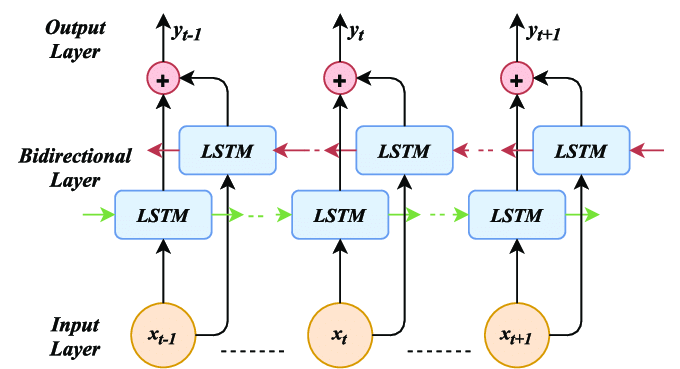

In [12]:
# https://pytorch.org/docs/stable/generated/torch.nn.RNN.html
bilstm = torch.nn.LSTM(input_size, hidden_size, batch_first=True, bidirectional=True)
outputs, _status = bilstm(input_data)
print(outputs)
print(outputs.size())
print()

print(_status[0])
print(_status[0].shape)

tensor([[[-0.0112,  0.0864,  0.2432, -0.2185,  0.0507, -0.1447],
         [ 0.0958,  0.1222,  0.4076, -0.1757,  0.1522, -0.1208],
         [ 0.1913,  0.1271,  0.4330, -0.2548,  0.0221,  0.1295],
         [ 0.2577,  0.1198,  0.4151, -0.1620,  0.0156,  0.1427],
         [ 0.2984,  0.0785,  0.4164,  0.0421,  0.0075,  0.1066]],

        [[ 0.0584,  0.0748,  0.3621, -0.1092,  0.1677, -0.1034],
         [ 0.1049,  0.0709,  0.4295, -0.0662,  0.0244,  0.1138],
         [ 0.1893,  0.1045,  0.4621, -0.2940,  0.0165,  0.1063],
         [ 0.2557,  0.1083,  0.4240, -0.2574,  0.0099,  0.0987],
         [ 0.2957,  0.1089,  0.4165, -0.1748,  0.0024,  0.0721]],

        [[ 0.0862,  0.0614,  0.3111, -0.2487,  0.0512, -0.0005],
         [ 0.1763,  0.0867,  0.3784, -0.1993,  0.0859, -0.1230],
         [ 0.2677,  0.0982,  0.4241, -0.1132,  0.1958, -0.2444],
         [ 0.3299,  0.1052,  0.4491, -0.1463,  0.1425, -0.1403],
         [ 0.3279,  0.1127,  0.4661, -0.1748,  0.0024,  0.0721]]],
       grad_fn=<Tra